### **Inporting the required packages**

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [69]:
df = datasets.load_digits()

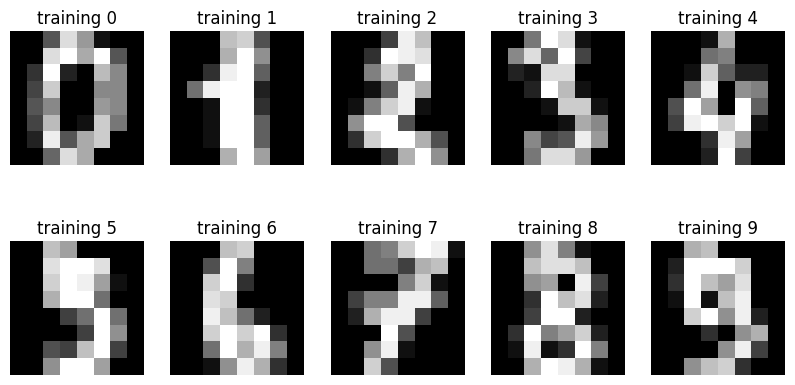

In [70]:
_, axes= plt.subplots(nrows=2, ncols=5, figsize=(10,5))

for ax,image,label in zip(axes.flatten(), df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.grey, interpolation='nearest')
  ax.set_title(f'training {label}')

In [71]:
X= df.data
y= df.target

### **Traning and segrating**

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=56)

### **Standard Scaler**

In [73]:
scaler= StandardScaler()

In [74]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Implementing LDA**

In [75]:
lda = LinearDiscriminantAnalysis(n_components=9)

In [76]:
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

### **Model Building**

#### **Linear Regression**

In [77]:
model_lr = LogisticRegression()
model_lr.fit(X_train_lda, y_train)

LogisticRegression()

In [78]:
y_pred = model_lr.predict(X_test_lda)

In [79]:
accuracy_score(y_test, y_pred)*100

96.66666666666667

#### **Decision Tree**

In [80]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_lda, y_train)

DecisionTreeClassifier()

In [81]:
y_pred_2 = model_dt.predict(X_test_lda)

In [82]:
accuracy_score(y_test, y_pred_2)*100

90.0

#### **Random Forest**

In [83]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_lda, y_train)

RandomForestClassifier()

In [84]:
y_pred_3 = model_rf.predict(X_test_lda)

In [85]:
accuracy_score(y_test, y_pred_3)*100

96.11111111111111